<a href="https://colab.research.google.com/github/ariabishma/tensorflow_linear_regression_sgd/blob/master/tensorflow_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [0]:
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
 
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 

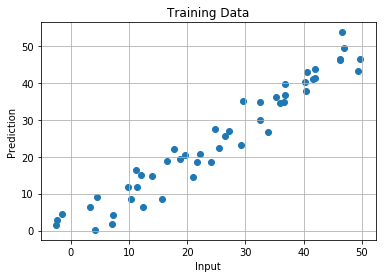

In [4]:
#init scatter plot
plt.scatter(x, y) 
plt.xlabel('Input') # add label from left to right
plt.ylabel('Prediction') # add label from bottom to top
plt.title("Training Data") # add global label
plt.grid(1) # show grid
plt.show() # draw our plot

In [0]:
def MakePrediction(xinput,m_train,b_train):
    
    # define x , m and b to tensorflow placeholder
    xp = tf.placeholder(dtype=tf.float64,name="xp")
    mp = tf.placeholder(dtype=tf.float64,name="mp")
    bp = tf.placeholder(dtype=tf.float64,name="bp")
    
    # compute prediction
    z = mp * xp + bp
    # start tensorflow session
    ses = tf.Session()
    
    # run variable z with tensorflow session
    pred = ses.run(z,feed_dict={xp:xinput,mp:m_train,bp:b_train})
    # returning pred variable
    return pred# closing session
    ses.close()

In [0]:
def TrainModel(xinput,yinput,learn_rate,epoch):
     # init x and y tensor variable
      X = tf.placeholder(dtype=tf.float64,name='X')
      Y = tf.placeholder(dtype=tf.float64,name='Y')

      # initializing m and b with random number
      M = tf.Variable(np.random.rand(),dtype=tf.float64,name='M')
      B = tf.Variable(np.random.rand(),dtype=tf.float64,name='B')

      Z = M * X + B

      # compute mean squared error
      loss = tf.reduce_sum(tf.pow(Z-Y, 2)) / (2 * len(xinput)) 

      # performing gradient descent optimizer for updating m and b 
      train = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)

      # init variable for store all losse
      losses = []

      # initializing all tensorflow variables
      var_init = tf.global_variables_initializer()

      with tf.Session() as ses:
        ses.run(var_init) # running var_init with tensorflow
        
        for i in range(epoch):
          
          # running loss with tensorflow
          losses.append(ses.run(loss,feed_dict={X:xinput,Y:yinput})) 
          
          ses.run(train,feed_dict={X:xinput,Y:yinput}) 
  
          if i % 50 == 0:
            print("Epoch = ",i,"/",epoch," , loss = ",ses.run(loss,feed_dict={X:xinput,Y:yinput}))
        
          m_train = ses.run(M,feed_dict={X:xinput,Y:yinput}) 
          b_train = ses.run(B,feed_dict={X:xinput,Y:yinput}) 

      return m_train,b_train,losses

In [15]:
# run train model with 0.00001 learning rate and 500 epoch
m,b,err = TrainModel(x,y,0.00001,500)

W0824 05:48:49.525238 140188550203264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch =  0 / 500  , loss =  266.459516643778
Epoch =  50 / 500  , loss =  116.96637178330239
Epoch =  100 / 500  , loss =  53.49931644351228
Epoch =  150 / 500  , loss =  26.554487516513028
Epoch =  200 / 500  , loss =  15.115106176337056
Epoch =  250 / 500  , loss =  10.258535592462252
Epoch =  300 / 500  , loss =  8.196685845465456
Epoch =  350 / 500  , loss =  7.321329960496741
Epoch =  400 / 500  , loss =  6.9496979775892855
Epoch =  450 / 500  , loss =  6.791921099910685


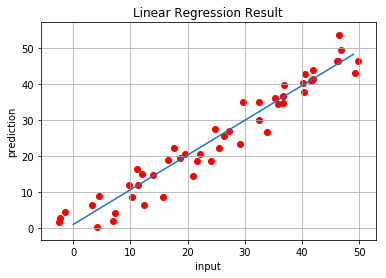

In [17]:
plt.plot(MakePrediction(np.linspace(0,50,50),m,b))
plt.scatter(x,y,color="r")
plt.title("Linear Regression Result")
plt.xlabel("input")
plt.ylabel("prediction")
plt.grid(1)